In [65]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import json

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [41]:
seqs = []
for method in ['codon_usage','cai','dinucleotide','codon_pair']:
    df = pd.read_excel(f'example_results/results_{method}.xlsx')
    for i, row in df[df['Seq Id'] != 'input'].iterrows():
        seqs.append({'method': method, 'id': row['Seq Id'], 'seq': row['DNA Sequence']})
seqs = pd.DataFrame(seqs).set_index(['method', 'id'])
seqs

seq
method       id                                                         
codon_usage  Output 1  AGAACTAAGAGGTTCGCCAAAGTAGGACAAAAACCAACACATTAAT...
             Output 2  AGAACTAAGAGATTCGCCAAAGTAGGACAAAAACCAACACACTAAT...
             Output 3  AGAACTAAGAGGTTCGCAAAAGTAGGACAAAAACCAACACATTAAT...
cai          Output 1  AGAACTAAGAGATTCGCCAAAGTAGGACAAAAACCAACACACTGAT...
             Output 2  AGAACTAAGAGATTCGCCAAAGTAGGACAAAAACCAACACACTGAT...
             Output 3  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACACTGAT...
dinucleotide Output 1  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACATTGAT...
             Output 2  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACATTGAT...
             Output 3  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACATTGAT...
codon_pair   Output 1  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACACTGAT...
             Output 2  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACACTGAT...
             Output 3  AGAACTAAGAGATTCGCAAAAGTAGGACAAAAACCAACACACTGAT...

In [42]:
def get_codons(seq):
    return [seq[i:i+3] for i in range(0, len(seq), 3)]

In [43]:
codon_counts = seqs.groupby('method')['seq'].apply(lambda seqs: pd.Series([c for seq in seqs for c in get_codons(seq)]).value_counts())
codon_counts = codon_counts.unstack().fillna(0)
codon_counts

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCA,TCC,TCT,TGA,TGC,TGG,TGT,TTC,TTG,TTT
method,,,,,,,,,,,,,,,,,,,,,
cai,6.0,6.0,21.0,3.0,3.0,42.0,0.0,3.0,28.0,48.0,...,0.0,3.0,0.0,30.0,18.0,15.0,0.0,33.0,3.0,0.0
codon_pair,9.0,3.0,18.0,6.0,20.0,21.0,0.0,7.0,29.0,27.0,...,0.0,9.0,9.0,18.0,15.0,15.0,3.0,25.0,3.0,8.0
codon_usage,9.0,3.0,18.0,6.0,12.0,15.0,6.0,15.0,18.0,12.0,...,9.0,15.0,9.0,15.0,9.0,15.0,9.0,18.0,9.0,15.0
dinucleotide,19.0,3.0,8.0,6.0,17.0,15.0,2.0,14.0,18.0,21.0,...,6.0,7.0,11.0,23.0,6.0,15.0,12.0,26.0,12.0,7.0


In [44]:
from Bio.Seq import Seq

def translate(codon):
    return str(Seq(codon).translate())    

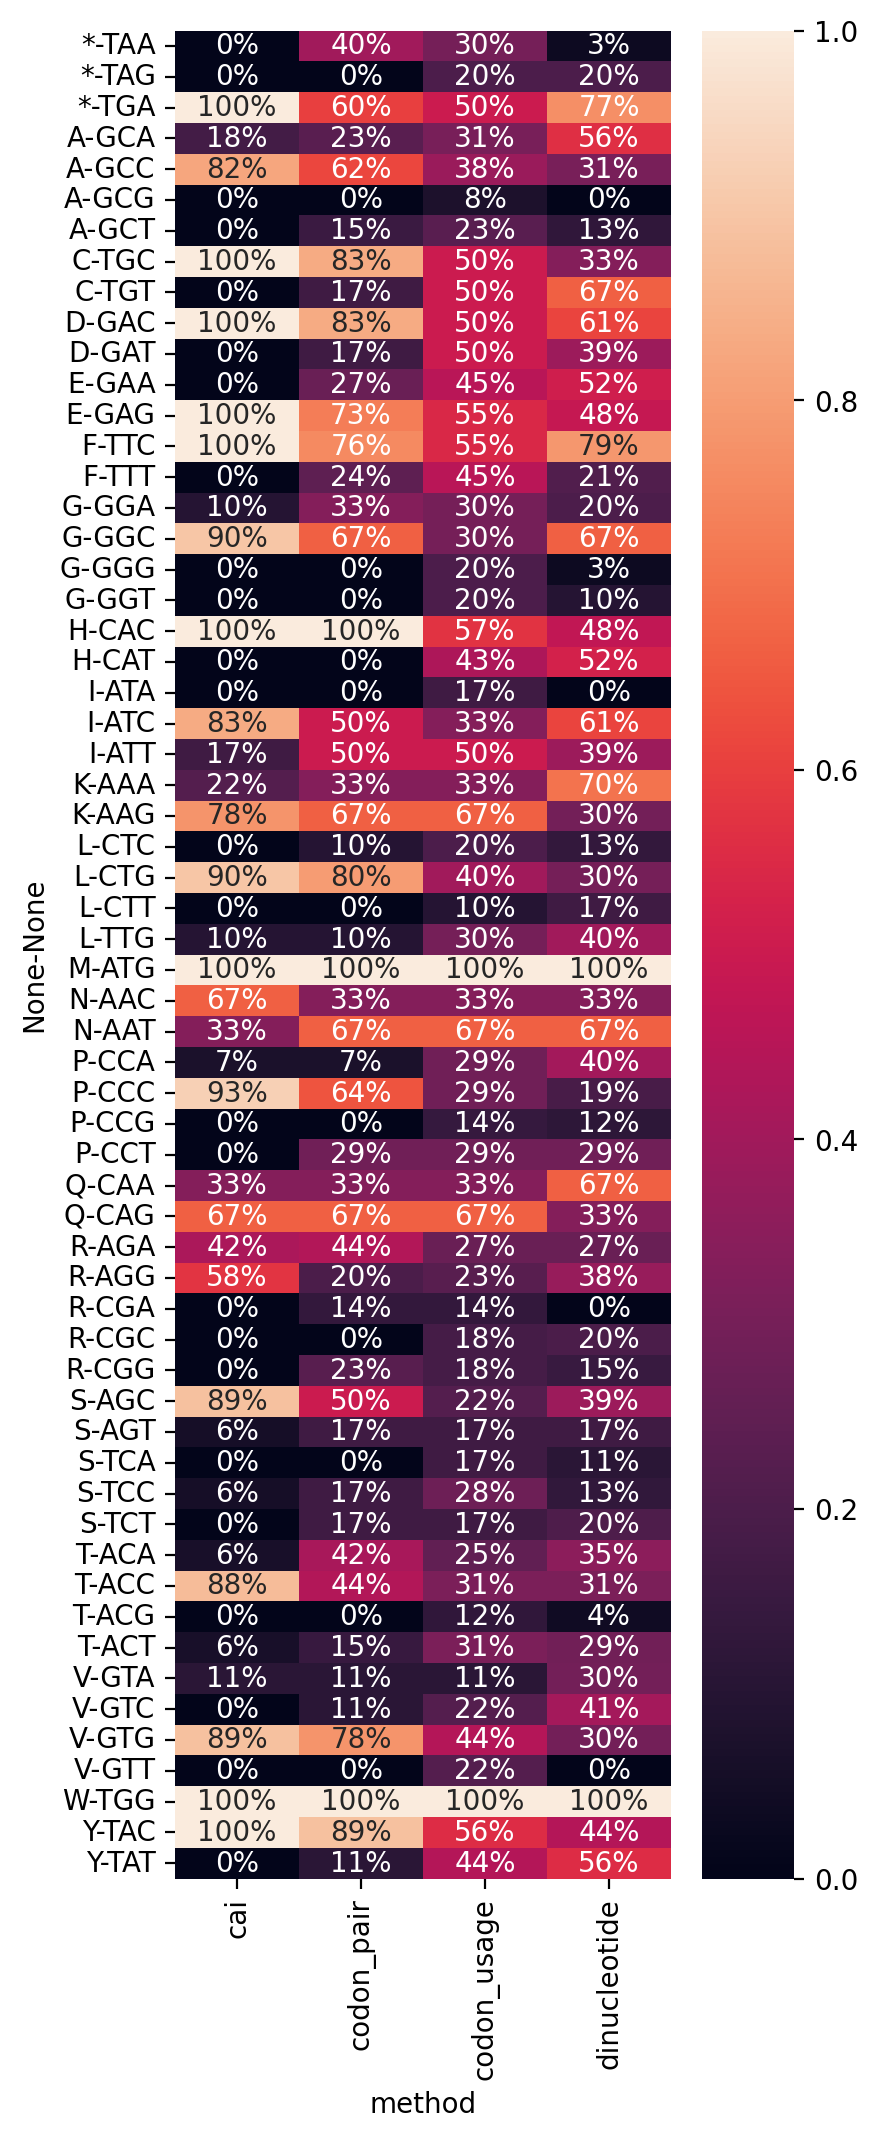

In [55]:
codon_freqs = codon_stats.T.groupby(codon_stats.columns.map(translate)).apply(lambda rows: rows / rows.sum())

fig, ax = plt.subplots(figsize=(4, 12))
sns.heatmap(codon_freqs, annot=True, fmt='.0%');

In [101]:
codon_freqs['codon_usage'].loc['P']

CCA    0.285714
CCC    0.285714
CCG    0.142857
CCT    0.285714
Name: codon_usage, dtype: float64

In [67]:
with open('../mrnaid/backend/common/objectives/data/dinucleotides_usage_h_sapiens.json') as f:
    h_sapiens_dinucl_counts = pd.Series(json.load(f))
h_sapiens_dinucl_counts

TT    0.052275
TC    0.057605
TA    0.033121
TG    0.077303
CT    0.069297
CC    0.074257
CA    0.081057
CG    0.028596
AT    0.053997
AC    0.055696
AA    0.076767
AG    0.082609
GT    0.045243
GC    0.065649
GA    0.077614
GG    0.068913
dtype: float64

In [56]:
def get_dinucleotides(seq):
    return [seq[i:i+2] for i in range(0, len(seq), 2)]

In [72]:
dinucl_counts = seqs.groupby('method')['seq'].apply(lambda seqs: pd.Series([c for seq in seqs for c in get_dinucleotides(seq)]).value_counts())
dinucl_counts = dinucl_counts.unstack().fillna(0)
dinucl_counts = dinucl_counts.divide(dinucl_counts.sum(axis=1), axis=0)
dinucl_counts.loc['ref_h_sapiens'] = h_sapiens_dinucl_counts
dinucl_counts

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
method,,,,,,,,,,,,,,,,
cai,0.037404,0.072607,0.115512,0.023102,0.096810,0.111111,0.029703,0.075908,0.107811,0.082508,0.072607,0.039604,0.016502,0.036304,0.069307,0.013201
codon_pair,0.066007,0.070407,0.084708,0.033003,0.102310,0.084708,0.023102,0.096810,0.084708,0.068207,0.068207,0.046205,0.023102,0.037404,0.085809,0.025303
codon_usage,0.058306,0.056106,0.084708,0.050605,0.062706,0.080308,0.040704,0.086909,0.092409,0.052805,0.061606,0.053905,0.048405,0.048405,0.067107,0.055006
dinucleotide,0.080308,0.055006,0.101210,0.047305,0.079208,0.072607,0.022002,0.082508,0.075908,0.058306,0.058306,0.051705,0.028603,0.059406,0.081408,0.046205
ref_h_sapiens,0.076767,0.055696,0.082609,0.053997,0.081057,0.074257,0.028596,0.069297,0.077614,0.065649,0.068913,0.045243,0.033121,0.057605,0.077303,0.052275


In [73]:
dinucl_counts.sum(axis=1)

method
cai              1.0
codon_pair       1.0
codon_usage      1.0
dinucleotide     1.0
ref_h_sapiens    1.0
dtype: float64

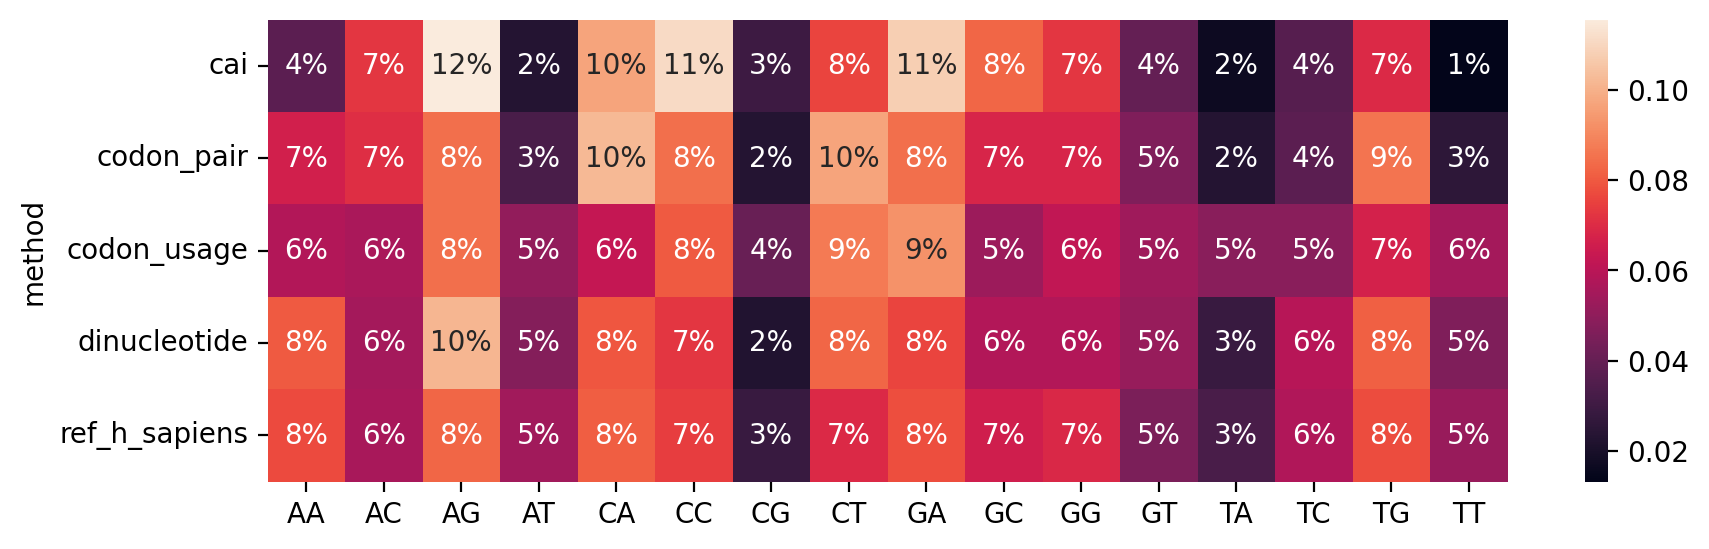

In [76]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.heatmap(dinucl_counts, annot=True, fmt='.0%');

In [80]:
dinucl_counts.T.corr()

method,cai,codon_pair,codon_usage,dinucleotide,ref_h_sapiens
method,,,,,
cai,1.000000,0.878160,0.783685,0.735056,0.763410
codon_pair,0.878160,1.000000,0.773168,0.855436,0.867585
codon_usage,0.783685,0.773168,1.000000,0.782863,0.729439
dinucleotide,0.735056,0.855436,0.782863,1.000000,0.939633
ref_h_sapiens,0.763410,0.867585,0.729439,0.939633,1.000000


In [85]:
with open('../mrnaid/backend/common/objectives/data/codon_pair_usage_h_sapiens.json') as f:
    h_sapiens_codon_pair_freq = pd.Series(json.load(f))
h_sapiens_codon_pair_freq

TTTTTT    0.000251
TTTTTC    0.000241
TTTTTA    0.000194
TTTTTG    0.000241
TTTCTT    0.000302
            ...   
GGGAGG    0.000191
GGGGGT    0.000179
GGGGGC    0.000483
GGGGGA    0.000193
GGGGGG    0.000124
Length: 4096, dtype: float64

In [86]:
h_sapiens_codon_pair_freq.sum()

0.9999999986000001

In [83]:
def get_codon_pairs(seq):
    return [seq[i:i+6] for i in range(0, len(seq), 6)]

In [93]:
codon_pair_freq = seqs.groupby('method')['seq'].apply(lambda seqs: pd.Series([c for seq in seqs for c in get_codon_pairs(seq)]).value_counts())
codon_pair_freq = codon_pair_freq.unstack().fillna(0)
codon_pair_freq = codon_pair_freq.divide(codon_pair_freq.sum(axis=1), axis=0)
codon_pair_freq.loc['ref_h_sapiens'] = h_sapiens_codon_pair_freq[codon_pair_freq.columns]
codon_pair_freq.loc['ref_h_sapiens'] = codon_pair_freq.loc['ref_h_sapiens'] / codon_pair_freq.loc['ref_h_sapiens'].sum()
codon_pair_freq

,AAAAGA,AAACCA,AAAGTA,AACTGC,AAGAGA,AAGAGG,AAGTAG,AAGTGA,AATGCA,AATTGC,...,TTGAGG,TTGCGC,TTGGAA,TTGGAC,TTGGCC,TTGTCT,TTTGGC,TTTGGT,TTTTTC,TTTTTT
method,,,,,,,,,,,,,,,,,,,,,
cai,0.000000,0.009901,0.009901,0.009901,0.019802,0.000000,0.000000,0.009901,0.009901,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
codon_pair,0.000000,0.009901,0.009901,0.009901,0.009901,0.009901,0.000000,0.009901,0.009901,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009901,0.000000,0.00000,0.00000
codon_usage,0.003300,0.009901,0.009901,0.006601,0.009901,0.006601,0.009901,0.000000,0.009901,0.003300,...,0.000000,0.006601,0.003300,0.000000,0.006601,0.000000,0.000000,0.006601,0.00000,0.00330
dinucleotide,0.009901,0.009901,0.009901,0.009901,0.009901,0.000000,0.009901,0.000000,0.009901,0.000000,...,0.006601,0.003300,0.000000,0.006601,0.000000,0.003300,0.009901,0.000000,0.00330,0.00000
ref_h_sapiens,0.004577,0.005037,0.003101,0.002980,0.004771,0.004990,0.000119,0.000261,0.004560,0.000884,...,0.001507,0.000602,0.006848,0.003265,0.003403,0.002083,0.003848,0.003080,0.00227,0.00236


In [94]:
codon_pair_freq.sum(axis=1)

method
cai              1.0
codon_pair       1.0
codon_usage      1.0
dinucleotide     1.0
ref_h_sapiens    1.0
dtype: float64

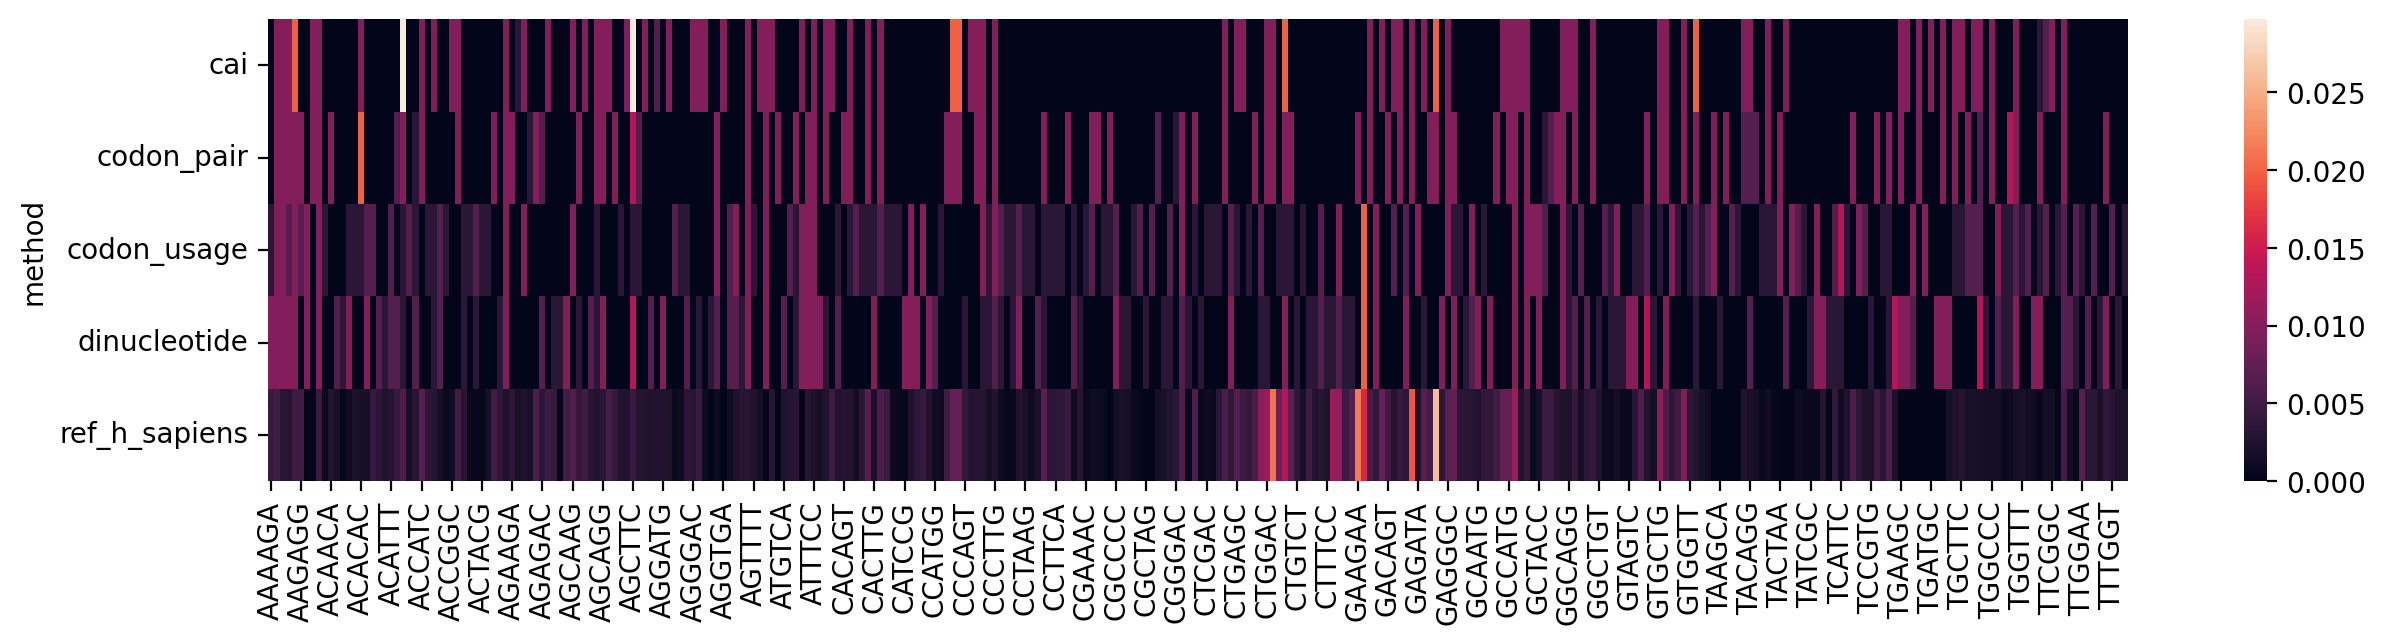

In [95]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(codon_pair_freq);

In [99]:
codon_pair_freq.T.corr()

method,cai,codon_pair,codon_usage,dinucleotide,ref_h_sapiens
method,,,,,
cai,1.000000,0.435335,-0.036145,0.032492,0.295413
codon_pair,0.435335,1.000000,-0.004337,0.026287,0.308414
codon_usage,-0.036145,-0.004337,1.000000,0.230628,-0.058251
dinucleotide,0.032492,0.026287,0.230628,1.000000,-0.024748
ref_h_sapiens,0.295413,0.308414,-0.058251,-0.024748,1.000000
